In [2]:
#Here is how those credit-hours you're paying for are distributed among department faculty.
#This notebook plots a pie chart of student-hours per instructor 
#from data here. https://htmlaccess.louisville.edu/classSchedule/searchClassSchedule.cfm
import numpy as np
from pandas import Series,DataFrame
import pandas as pd


In [3]:
#Select the table in a browser, paste it into Excel, and export it as a csv
#It is usually, but not always happy with the first row--you may need to unmerge rows 1 &2 in Excel
dframe=pd.read_csv('TodaysData.csv')

In [4]:
dframe #what did you find

,Class,Subj,Cat,Sec,Title,Days,Unnamed: 6,Unnamed: 7,Time,Bldg,Enroll,Wait,Instr,Units,Location
0,Nbr,NaN,Nbr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2403,ECE,210,1,LOGIC DESIGN�,MWF,11:00am-11:50am,DA101,64 of 65,0 of 5,"Welch, K�",3,BELKNAP,NaN,NaN
2,NaN,NaN,NaN,NaN,Note:�This section has been changed.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2404,ECE,211,1,LOGIC DESIGN LABORATORY,W,03:00pm-05:30pm,WS210,16 of 16,0 of 5,"Welch, K�",1,BELKNAP,NaN,NaN
4,7614,ECE,211,2,LOGIC DESIGN LABORATORY,M,03:00pm-05:30pm,WS210,16 of 16,2 of 5,"Welch, K�",1,BELKNAP,NaN,NaN
5,8602,ECE,211,3,LOGIC DESIGN LABORATORY�,F,03:00pm-05:30pm,WS210,16 of 16,4 of 5,"Welch, K�",1,BELKNAP,NaN,NaN
6,NaN,NaN,NaN,NaN,Note:�This section has been added.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8603,ECE,211,4,LOGIC DESIGN LABORATORY�,T,03:00pm-05:30pm,WS210,16 of 16,1 of 5,"Welch, K�",1,BELKNAP,NaN,NaN
8,NaN,NaN,NaN,NaN,Note:�This section has been added.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2405,ECE,220,1,NETWORK ANALYSIS I�,MWF,09:00am-09:50am,WS106,10 of 35,0 of 5,"Welch, K�",3,BELKNAP,NaN,NaN


In [5]:
import sys
dframe.columns

Index([u'Class', u'Subj', u'Cat', u'Sec', u'Title', u'Days', u'Unnamed: 6',
       u'Unnamed: 7', u'Time', u'Bldg', u'Enroll', u'Wait', u'Instr', u'Units',
       u'Location'],
      dtype='object')

In [6]:
#dframe.to_csv(sys.stdout)#showed that the labels were are all wrong, this fixes it:
dframe.columns=['Class','Subj','Cat','Sec','Title','Days','Time','Bldg','Enroll','Wait','Instr','Units','Location','Unnamed:6','Unnamed:7']
#dframe.to_csv(sys.stdout,columns=['Instr','Cat','Sec','Enroll','Units'])
#Now make a data frame with only the cols I care about 
mydata=DataFrame(dframe,columns=['Instr','Cat','Sec','Enroll','Units'])
#get rid of any rows having a NaN 
mydata=mydata.dropna()
enrollstrings=mydata.Enroll.tolist()#Enroll needs to be a string. some years there is an int that messes it up
mydata.Enroll = enrollstrings
mydata

,Instr,Cat,Sec,Enroll,Units
1,"Welch, K�",210,1,64 of 65,3
3,"Welch, K�",211,1,16 of 16,1
4,"Welch, K�",211,2,16 of 16,1
5,"Welch, K�",211,3,16 of 16,1
7,"Welch, K�",211,4,16 of 16,1
9,"Welch, K�",220,1,10 of 35,3
11,"Welch, K�",221,1,3 of 16,1
13,"Welch, K�",221,2,7 of 15,1
14,"Cleaver, T�",252,1,40 of 40,3
15,"Cleaver, T�",252,2,40 of 40,3


In [7]:
last=mydata.Instr.str.split(',',1).tolist()

In [8]:
last[3][0]#this will get the last name of the 4th row

'Welch'

In [9]:
numstu=mydata.Enroll.str.split(' ',1).tolist()

In [10]:
numstu

[['64', 'of 65'],
 ['16', 'of 16'],
 ['16', 'of 16'],
 ['16', 'of 16'],
 ['16', 'of 16'],
 ['10', 'of 35'],
 ['3', 'of 16'],
 ['7', 'of 15'],
 ['40', 'of 40'],
 ['40', 'of 40'],
 ['10', 'of 50'],
 ['20', 'of 50'],
 ['5', 'of 50'],
 ['30', 'of 30'],
 ['35', 'of 40'],
 ['48', 'of 48'],
 ['0', 'of 50'],
 ['11', 'of 25'],
 ['24', 'of 25'],
 ['4', 'of 25'],
 ['0', 'of 0'],
 ['TBA'],
 ['18', 'of 25'],
 ['17', 'of 25'],
 ['5', 'of 25'],
 ['7', 'of 25'],
 ['5', 'of 25'],
 ['5', 'of 25'],
 ['1', 'of 25'],
 ['6', 'of 25'],
 ['0', 'of 0'],
 ['19', 'of 25'],
 ['19', 'of 25'],
 ['14', 'of 30'],
 ['1', 'of 30'],
 ['1', 'of 15'],
 ['0', 'of 25'],
 ['0', 'of 0'],
 ['0', 'of 25'],
 ['TBA'],
 ['1', 'of 25'],
 ['2', 'of 25'],
 ['0', 'of 25'],
 ['4', 'of 25'],
 ['4', 'of 8'],
 ['TBA'],
 ['1', 'of 25'],
 ['0', 'of 25'],
 ['3', 'of 25'],
 ['3', 'of 25'],
 ['0', 'of 25'],
 ['0', 'of 0'],
 ['0', 'of 25'],
 ['0', 'of 0'],
 ['0', 'of 25'],
 ['0', 'of 0'],
 ['0', 'of 25'],
 ['0', 'of 25'],
 ['0', 'of 25'],
 ['0'

In [11]:
numstu[21][0]

'TBA'

In [12]:
def chopTBA(thing):
    if thing[0] == 'TBA': #it could say TBA if class has not filled yet
        return 0
    else:  #return integer of enrolled students
        return int(float(thing[0]))  #and chop off the 'of whatever' part
                                     #but it could be interesting to show anticipated vs actual enrolment
                                     #as a function of instructor name
numstuint=[chopTBA(item) for item in numstu] #Change numstu to be the number of enrolled students
        #by keeping only the first value. Or if it's a TBA or nan, shove a 0 there
numstuint


[64,
 16,
 16,
 16,
 16,
 10,
 3,
 7,
 40,
 40,
 10,
 20,
 5,
 30,
 35,
 48,
 0,
 11,
 24,
 4,
 0,
 0,
 18,
 17,
 5,
 7,
 5,
 5,
 1,
 6,
 0,
 19,
 19,
 14,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 4,
 4,
 0,
 1,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [13]:
numunits=mydata.Units.tolist()
numunitsint = [ int(float(item [0])) for item in numunits]#keep only 1st digit, fails if a course has >9 units
numunitsint

[3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 0,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 0,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 2,
 0,
 3,
 3,
 3,
 3,
 1,
 0,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 0,
 1,
 1,
 3,
 1]

In [14]:
sthrs=[a*b for a,b in zip(numstuint,numunitsint)]
sthrs

[192,
 16,
 16,
 16,
 16,
 30,
 3,
 7,
 120,
 120,
 0,
 40,
 10,
 90,
 105,
 144,
 0,
 22,
 72,
 12,
 0,
 0,
 54,
 17,
 5,
 21,
 15,
 5,
 3,
 18,
 0,
 57,
 19,
 42,
 3,
 1,
 0,
 0,
 0,
 0,
 3,
 6,
 0,
 12,
 4,
 0,
 1,
 0,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [15]:
lastlist=[item[0] for item in last]
lastlist

['Welch',
 'Welch',
 'Welch',
 'Welch',
 'Welch',
 'Welch',
 'Welch',
 'Welch',
 'Cleaver',
 'Cleaver',
 'Gray',
 'Gray',
 'Gray',
 'Harnett',
 'Amini',
 'Harnett',
 'Gray',
 'Cohn',
 'Faul',
 'McIntyre',
 'Naber',
 '0 of 0',
 'Faul',
 'Faul',
 'Zurada',
 'Zurada',
 'Inanc',
 'Inanc',
 'Farag',
 'McIntyre',
 "O'Connell",
 'Naber',
 'Naber',
 'Walsh',
 'Li',
 'Li',
 'TBA\xca',
 'Naber',
 'Gerstle',
 '0 of 0',
 'Zurada',
 'Farag',
 'Lilly',
 'McNamara',
 'McNamara',
 '0 of 0',
 'Farag',
 'Lilly',
 'Cohn',
 'Beyerle',
 'Naber',
 'Naber',
 'Naber',
 'Naber',
 'Naber',
 'Naber',
 'TBA\xca',
 'Naber',
 'Naber',
 'Naber',
 'Naber',
 'Naber']

In [16]:
mydata.Instr=lastlist #replace instructor string with my last-name list. Still has some TBA junk
#but the TBAs have 0 students and those will get removed later.
mydata.Units=numunitsint #change units to int, by replacing it with my list
mydata.Enroll=numstuint #and change the enrollment string by replacing it with my list
mydata['Sthrs']=sthrs#this worked to add a new Sthrs (student-hours) column
mydata

,Instr,Cat,Sec,Enroll,Units,Sthrs
1,Welch,210,1,64,3,192
3,Welch,211,1,16,1,16
4,Welch,211,2,16,1,16
5,Welch,211,3,16,1,16
7,Welch,211,4,16,1,16
9,Welch,220,1,10,3,30
11,Welch,221,1,3,1,3
13,Welch,221,2,7,1,7
14,Cleaver,252,1,40,3,120
15,Cleaver,252,2,40,3,120


In [17]:
#Find all distinct instructor names in Instr!
people=pd.unique(mydata.Instr.ravel())
people

array(['Welch', 'Cleaver', 'Gray', 'Harnett', 'Amini', 'Cohn', 'Faul',
       'McIntyre', 'Naber', '0 of 0', 'Zurada', 'Inanc', 'Farag',
       "O'Connell", 'Walsh', 'Li', 'TBA\xca', 'Gerstle', 'Lilly',
       'McNamara', 'Beyerle'], dtype=object)

In [18]:
#Then add student-hours across all courses and sections taught by that instructor.
#http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

In [19]:
profname=[]
profhrs=[]#array for the prof-hours data--probably more efficient to make a list?
profpct=[]
proflabel=[]
#I know it should be the same length as the people list
depthrs=sum(mydata.Sthrs)#for computing percentages
depthrs

1335

In [20]:
#Then get the data into a chart. Who's bringing in the tuition 


In [21]:
for person in people:
    #personframe=individual professor's course load
    personframe=mydata.loc[mydata.Instr==person]
    personshrs=personframe.Sthrs.sum()
    personspct=float(personshrs)/float(depthrs)*100
    personslabel=person + ' ' + '%.1f' % personspct +'%' #label for pie chart showing percent
    if personshrs > 0:
        profhrs.append(personshrs)
        profname.append(person)
        profpct.append(personspct)
        proflabel.append(personslabel)


In [22]:
proflabel

['Welch 22.2%',
 'Cleaver 18.0%',
 'Gray 3.7%',
 'Harnett 17.5%',
 'Amini 7.9%',
 'Cohn 2.3%',
 'Faul 10.7%',
 'McIntyre 2.2%',
 'Naber 5.7%',
 'Zurada 2.2%',
 'Inanc 1.5%',
 'Farag 0.7%',
 'Walsh 3.1%',
 'Li 0.3%',
 'McNamara 1.2%',
 'Beyerle 0.7%']

In [23]:
#now sort by student-hours so all the big wedges are together
sortlabel=[sortpct for sortlabel, sortpct in sorted(zip(profpct,proflabel), reverse=True)]
sortpct=sorted(profpct,reverse=True)
sortlabel
sortpct

[22.172284644194757,
 17.97752808988764,
 17.528089887640448,
 10.711610486891386,
 7.865168539325842,
 5.692883895131086,
 3.7453183520599254,
 3.146067415730337,
 2.3220973782771535,
 2.247191011235955,
 2.1722846441947565,
 1.4981273408239701,
 1.198501872659176,
 0.7490636704119851,
 0.6741573033707865,
 0.299625468164794]

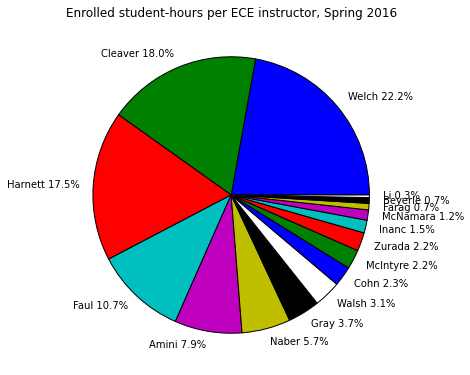

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
#getting this from here http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb
plt.figure(1,figsize=(6,6))
ax=plt.axes([0.1, 0.1, 0.8, 0.8])
plt.pie(sortpct,labels=sortlabel)
plt.title('Enrolled student-hours per ECE instructor, Spring 2016')